### Project : Reducing monthly churn by identifying high risk customers well in advance
About the Project: The project related to applying predictive analytics on customer churn. A major telecom company’s postpaid business of voice-only plans is struggling to maintain its strong foothold in local market because of:
-	High churn rate amongst customers leading to a revenue decline of ~500k USD every month
-	Decline in overall customer base (high churn rate combined with low acquisition rate), leading to a decline in total market share
 

### Aim:


1.	Build a classification model to predict churners one month in advance


2.	Identify key churn drivers


Hypothesis: Company CEO believes that existing models can predict churners precisely, but it’s too late to take any retention actions, as customer usage has significantly declined by then.


### Load Important Libraries 

In [1]:
#Load Essential Libraries

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)


### Set Working Directory 

In [2]:
os.chdir("C:\\Internships & Projects\\AINE AI Internship\\Project 8")

### Load The Data 

In [3]:
data = pd.read_csv("Telecom_Data.csv")

### Descriptive Statistics of train data

In [4]:
data.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [5]:
data.shape

(51047, 58)

In [6]:
data.describe()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,5.104700e+04,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50680.000000,50680.000000,51047.000000,...,51046.000000,51046.000000,51046.000000,50138.000000,50138.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000
mean,3.201957e+06,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,6.011489,...,1.805646,1.558751,380.545841,31.338127,21.144142,0.037201,0.018277,0.052070,4.324524,0.053911
std,1.169056e+05,44.507336,529.871063,23.848871,2.228546,96.588076,9.818294,257.514772,39.574915,9.043955,...,1.331173,0.905932,253.801982,22.094635,23.931368,0.206483,0.142458,0.307592,3.138236,0.383147
min,3.000002e+06,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,...,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.100632e+06,33.610000,158.000000,30.000000,0.000000,0.000000,0.000000,-83.000000,-7.100000,0.700000,...,1.000000,1.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.201534e+06,48.460000,366.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,3.000000,...,1.000000,1.000000,329.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,3.305376e+06,71.065000,723.000000,60.000000,0.990000,41.000000,0.300000,66.000000,1.600000,7.700000,...,2.000000,2.000000,515.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000
max,3.399994e+06,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,221.700000,...,24.000000,15.000000,1812.000000,99.000000,99.000000,4.000000,3.000000,35.000000,9.000000,25.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

# Q1. Detect and resolve problems in the data (Missing value, Outliers, Unexpected value, etc.)

### Q1.1 How many customers had zero monthly revenue?

In [8]:
data[(data.MonthlyRevenue == 0)]

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
12262,3096670,Yes,0.0,2.0,0.0,0.0,0.0,0.0,NaN,NaN,...,0,0,No,0,30,No,5-Low,Suburban,Other,Unknown
13127,3103410,Yes,0.0,55.0,0.0,0.0,0.0,0.0,NaN,NaN,...,0,4,No,0,10,No,4-Medium,Other,Other,Unknown
42051,3334666,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,No,0,Unknown,No,5-Low,Other,Other,Unknown
49920,3391282,No,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,4,No,1,30,No,1-Highest,Suburban,Other,Yes
49946,3391442,No,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,5,No,0,Unknown,No,1-Highest,Other,Other,Unknown
51035,3399894,No,0.0,76.0,30.0,0.0,0.0,0.0,0.0,0.0,...,0,4,No,0,Unknown,No,2-High,Other,Professional,No


Total six Customers have zero Monthly Revenue

### Missing Value Analysis 

In [9]:
missing_val = data.isna().sum()
missing_val_Percent = (missing_val/len(data))*100
missing_val_analysis = {'missing_val': missing_val , 'missing_val_percentage': missing_val_Percent}
missing_val_analysis = pd.DataFrame(missing_val_analysis)
missing_val_analysis

,missing_val,missing_val_percentage
CustomerID,0,0.000000
Churn,0,0.000000
MonthlyRevenue,156,0.305601
MonthlyMinutes,156,0.305601
TotalRecurringCharge,156,0.305601
DirectorAssistedCalls,156,0.305601
OverageMinutes,156,0.305601
RoamingCalls,156,0.305601
PercChangeMinutes,367,0.718945
PercChangeRevenues,367,0.718945


### Q1.2 How many columns has missing values percentage > 5% 

Zero columns Contains missing value greater than 5%.  Less than 2% of data is missing. Drop the rows containing missing values rather than imputing them

In [10]:
data = data.dropna()
missing_val = data.isna().sum()
missing_val

CustomerID                   0
Churn                        0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
UnansweredCalls              0
CustomerCareCalls            0
ThreewayCalls                0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
PeakCallsInOut               0
OffPeakCallsInOut            0
DroppedBlockedCalls          0
CallForwardingCalls          0
CallWaitingCalls             0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
ServiceArea                  0
Handsets                     0
HandsetModels                0
CurrentEquipmentDays         0
AgeHH1                       0
AgeHH2                       0
Children

### Q1.3 For columns, "UniqueSubs" and "DirectorAssistedCalls" remove outliers, if any 

<AxesSubplot:>

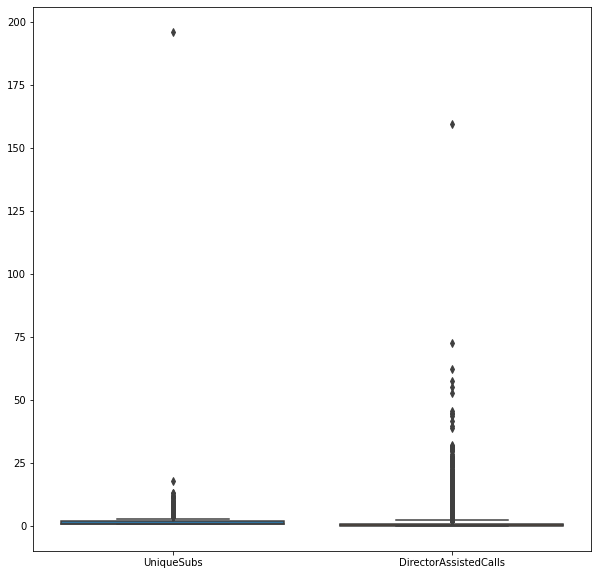

In [11]:
#Check for outliers in data using boxplot
sns.boxplot(data=data[['UniqueSubs','DirectorAssistedCalls']])
fig=plt.gcf()
fig.set_size_inches(10,10)

In [12]:
pnames = ['UniqueSubs','DirectorAssistedCalls']

for i in pnames :
 print (i)
 q75,q25 = np.percentile(data.loc[:,i],[75,25])
 iqr = q75-q25

 min = q25 - (iqr*1.5)
 max = q75 + (iqr*1.5)
 print (min)
 print (max)

data = data.drop(data[data.loc[:,i] < min].index)
data = data.drop(data[data.loc[:,i] > max].index)

UniqueSubs
-0.5
3.5
DirectorAssistedCalls
-1.4849999999999999
2.4749999999999996


In [13]:
data.shape

(44374, 58)

# Q2. Perform exploratory analysis to analyze customer churn 

In [14]:
data.dtypes

CustomerID                     int64
Churn                         object
MonthlyRevenue               float64
MonthlyMinutes               float64
TotalRecurringCharge         float64
DirectorAssistedCalls        float64
OverageMinutes               float64
RoamingCalls                 float64
PercChangeMinutes            float64
PercChangeRevenues           float64
DroppedCalls                 float64
BlockedCalls                 float64
UnansweredCalls              float64
CustomerCareCalls            float64
ThreewayCalls                float64
ReceivedCalls                float64
OutboundCalls                float64
InboundCalls                 float64
PeakCallsInOut               float64
OffPeakCallsInOut            float64
DroppedBlockedCalls          float64
CallForwardingCalls          float64
CallWaitingCalls             float64
MonthsInService                int64
UniqueSubs                     int64
ActiveSubs                     int64
ServiceArea                   object
H

### Q2.1 Does customers with high overage minutes also have high revenue? 

<AxesSubplot:xlabel='OverageMinutes', ylabel='MonthlyRevenue'>

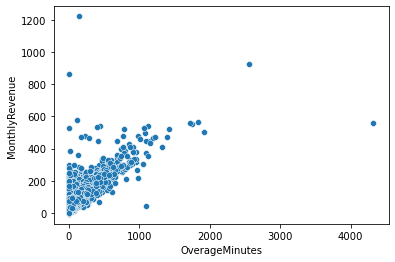

In [15]:
#use scatter plot to find the correlation between monthly revenue and overage minutes
sns.scatterplot(x = 'OverageMinutes', y = 'MonthlyRevenue', data = data)

From above scatter plot we can easily see that as high overage minutes also have high revenue

### Q2.2 Does high number of active subscribers lead to low monthly revenue? 

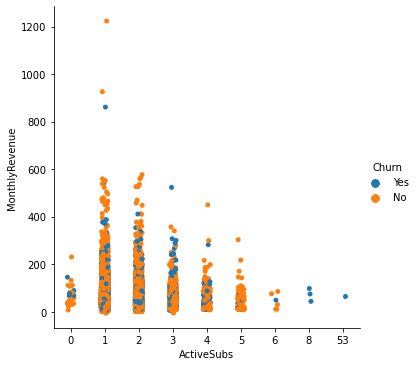

In [16]:
#use category plot to plot monthly revenue for each active subs category
sns.catplot(x="ActiveSubs", y="MonthlyRevenue", hue="Churn", data=data)

Yes, above graph shows high number of active subscribers lead to low monthly revenue.

### Q2.3 Does credit rating have an impact in churn rate? 

In [17]:
data['CreditRating'].unique()

array(['1-Highest', '4-Medium', '3-Good', '2-High', '5-Low', '6-VeryLow',
       '7-Lowest'], dtype=object)

In [18]:
data.groupby('CreditRating')['CustomerID'].count()

CreditRating
1-Highest     7601
2-High       17230
3-Good        7206
4-Medium      4540
5-Low         5179
6-VeryLow      748
7-Lowest      1870
Name: CustomerID, dtype: int64

In [19]:
# mapping the crewdit rating from 1 to 5 considering 5 as highest & 1 as Lowest
mapping = {'1-Highest': 5,
          '2-High': 4,
          '3-Good': 3,
          '4-Medium':3,
          '5-Low':2,
          '6-VeryLow':1,
          '7-Lowest':1}

In [20]:
data['CreditRating'] = data['CreditRating'].map(mapping)

In [21]:
data.groupby('CreditRating')['CustomerID'].count()

CreditRating
1     2618
2     5179
3    11746
4    17230
5     7601
Name: CustomerID, dtype: int64

<BarContainer object of 5 artists>

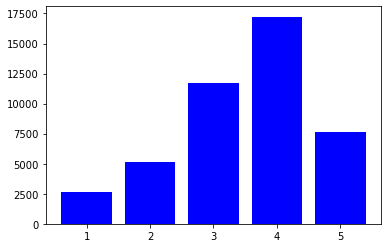

In [22]:
values = (2618, 5179, 11746, 17230, 7601)
labels = (1 , 2 , 3 , 4 , 5)
plt.bar(labels, values, color = 'Blue')

<Figure size 576x576 with 0 Axes>

<AxesSubplot:xlabel='CreditRating', ylabel='count'>

Text(0.5, 0, 'CreditRating')

Text(0, 0.5, 'Churn_Count')

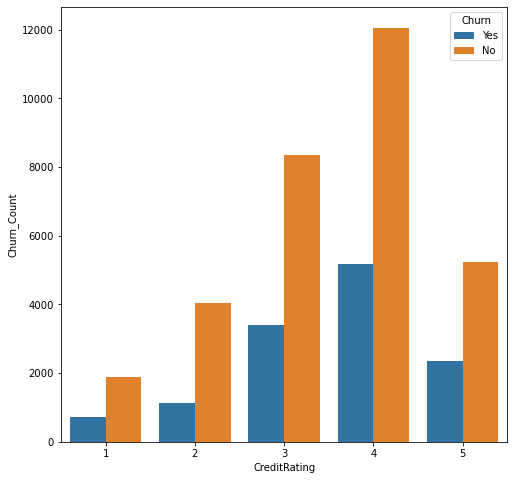

In [23]:
plt.figure(figsize=(8,8))
sns.countplot(data['CreditRating'], hue=data["Churn"])
plt.xlabel('CreditRating')
plt.ylabel('Churn_Count')
plt.show()

Observation: credit rating have an impact in churn rate



# Q3. Create additional features to help predict churn

In [24]:
#wrapper function to create additional features for churn prediction
def create_features(data):
    
    #3.1 Percent of current active subs over total subs
    
    data['perc_active_subs'] = data['ActiveSubs'] / data['UniqueSubs']
    
    #3.2 Percent of recurrent charge to monthly charge
    
    data['perc_recurrent_charge']= data['TotalRecurringCharge'] / data['MonthlyRevenue']
    
    #3.3 Percent of overage minutes over total monthly minutes
    
    data['perc_overage_min']= data['OverageMinutes'] / data['MonthlyMinutes']
    
    #3.4 total of Dropped Unanswered and blocked calls
    
    data['Not_Answered_Calls'] = data['DroppedBlockedCalls']+data['DroppedCalls']+data['BlockedCalls']+data['UnansweredCalls']
    
    
    
    return data  

In [25]:
#Make a call to the feature engineering wrapper function for churn prediction
data=create_features(data)
data.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_overage_min,Not_Answered_Calls
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,30,Yes,5,Suburban,Professional,No,0.5,0.916667,0.0,9.0
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,30,No,3,Suburban,Professional,Yes,1.0,1.000589,0.0,3.3
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,Unknown,No,3,Town,Crafts,Yes,1.0,1.000000,0.0,0.0
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,10,No,3,Other,Other,No,1.0,0.911522,0.0,195.4
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,10,No,5,Other,Professional,Yes,1.0,0.991832,NaN,0.0


In [26]:
# drop the columns after creating new important features
data= data.drop(['ActiveSubs', 'UniqueSubs', 'TotalRecurringCharge', 'MonthlyRevenue', 'OverageMinutes', 'MonthlyMinutes',
                
                'DroppedBlockedCalls', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls'], axis = 1)

In [27]:
#Changing the data type of Target variable
data['Churn'].unique()

array(['Yes', 'No'], dtype=object)

In [28]:
data.Churn.replace(('Yes', 'No'), (1, 0), inplace=True)

### Encoding Categorical Features
Machine learning algorithm can only read numerical values. It is therefore essential to encode categorical features into numerical values

In [29]:
#categorical features
cat_var = ['ChildrenInHH', 'HandsetRefurbished', 
          'HandsetWebCapable', 'TruckOwner', 'RVOwner', 
          'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers', 
          'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 
          'NewCellphoneUser', 'NotNewCellphoneUser', 'OwnsMotorcycle', 
           'MadeCallToRetentionTeam','PrizmCode', 'Occupation', 'MaritalStatus', 'ServiceArea']

from sklearn.preprocessing import LabelEncoder

# initializing label encoder
le= LabelEncoder()

# iterating through each categorical feature and label encoding them
for feature in cat_var:
    data[feature]= le.fit_transform(data[feature])

In [30]:
# Create Bins = 10 For ServiceArea 
data['ServiceAreaGroup'] = pd.cut(data['ServiceArea'], bins = 10,
                                 labels = ['ServiceAreaGroup0',
                                          'ServiceAreaGroup1',
                                          'ServiceAreaGroup2',
                                          'ServiceAreaGroup3',
                                          'ServiceAreaGroup4',
                                          'ServiceAreaGroup5',
                                          'ServiceAreaGroup6',
                                          'ServiceAreaGroup7',
                                          'ServiceAreaGroup8',
                                          'ServiceAreaGroup9'])

In [31]:
# Create Dummies For ServiceAreaGroup
data['ServiceAreaGroup'] = pd.get_dummies(data['ServiceAreaGroup'])

In [32]:
#drop the service area and Customer ID
data = data.drop(columns =['ServiceArea', 'CustomerID' ], axis = 1)

In [33]:
data.head()

,Churn,DirectorAssistedCalls,RoamingCalls,PercChangeMinutes,PercChangeRevenues,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,...,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_overage_min,Not_Answered_Calls,ServiceAreaGroup
0,1,0.25,0.0,-157.0,-19.0,0.0,0.0,97.2,0.0,0.0,...,1,5,2,4,0,0.5,0.916667,0.0,9.0,0
1,1,0.00,0.0,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,3,2,4,2,1.0,1.000589,0.0,3.3,0
2,0,0.00,0.0,-2.0,0.0,0.0,0.0,0.4,0.3,0.0,...,0,3,3,1,2,1.0,1.000000,0.0,0.0,0
3,0,1.24,0.0,157.0,8.1,4.3,1.3,200.3,370.3,147.0,...,0,3,0,3,0,1.0,0.911522,0.0,195.4,0
4,1,0.00,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,...,0,5,0,4,2,1.0,0.991832,NaN,0.0,0


##### Handset price is numerical however it is howing as object because of 'Unknown' present in Data set. Unknown represents the missing value.  Filling missing value with mean to change its data type

In [34]:
data['HandsetPrice'].unique()

array(['30', 'Unknown', '10', '80', '150', '300', '40', '100', '130',
       '200', '60', '400', '250', '180', '240', '500'], dtype=object)

In [35]:
#Replacing 'Unknown' with 'NaN'
data['HandsetPrice'] = data['HandsetPrice'].replace("Unknown", np.nan)

In [36]:
data['HandsetPrice'].unique()

array(['30', nan, '10', '80', '150', '300', '40', '100', '130', '200',
       '60', '400', '250', '180', '240', '500'], dtype=object)

In [37]:
#Checking for missing value Count
data['HandsetPrice'].isna().sum()

26136

In [38]:
#reshaping to impute missing values
Column = data['HandsetPrice'].values.reshape(-1,1)

In [39]:
#impute missing values with mean
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
data['HandsetPrice'] = imp_mean.fit_transform(Column)

In [40]:
data.dtypes

Churn                          int64
DirectorAssistedCalls        float64
RoamingCalls                 float64
PercChangeMinutes            float64
PercChangeRevenues           float64
CustomerCareCalls            float64
ThreewayCalls                float64
ReceivedCalls                float64
OutboundCalls                float64
InboundCalls                 float64
PeakCallsInOut               float64
OffPeakCallsInOut            float64
CallForwardingCalls          float64
CallWaitingCalls             float64
MonthsInService                int64
Handsets                     float64
HandsetModels                float64
CurrentEquipmentDays         float64
AgeHH1                       float64
AgeHH2                       float64
ChildrenInHH                   int32
HandsetRefurbished             int32
HandsetWebCapable              int32
TruckOwner                     int32
RVOwner                        int32
Homeownership                  int32
BuysViaMailOrder               int32
R

#### Cleaning the data to avoid any kind of value error 

In [41]:
def clean_dataset(data):
    assert isinstance(data, pd.DataFrame), "df needs to be a pd.DataFrame"
    data.dropna(inplace=True)
    indices_to_keep = ~data.isin([np.nan, np.inf, -np.inf]).any(1)
    return data[indices_to_keep].astype(np.float64)

In [42]:
data =  clean_dataset(data)

# Coerrelation Analysis

In [43]:
data.corr()

,Churn,DirectorAssistedCalls,RoamingCalls,PercChangeMinutes,PercChangeRevenues,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,...,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_overage_min,Not_Answered_Calls,ServiceAreaGroup
Churn,1.000000,-0.010037,0.012204,-0.035684,0.012856,-0.032206,-0.020743,-0.027282,-0.022572,-0.028635,...,0.059275,0.042689,0.000713,-0.006103,0.008247,-0.054413,-0.051276,0.053659,-0.015084,-0.013888
DirectorAssistedCalls,-0.010037,1.000000,0.036731,-0.015069,-0.012212,0.061667,0.062639,0.189332,0.230078,0.124648,...,-0.002334,-0.059428,-0.021396,-0.010056,-0.039909,-0.024315,-0.183830,0.082040,0.201473,0.003239
RoamingCalls,0.012204,0.036731,1.000000,-0.049867,-0.078823,0.018897,0.020524,0.035774,0.028460,0.010709,...,-0.001912,-0.016586,-0.000866,-0.007640,-0.000219,0.007043,-0.125669,0.008608,0.043797,0.007585
PercChangeMinutes,-0.035684,-0.015069,-0.049867,1.000000,0.592929,-0.033830,-0.047253,-0.095874,-0.058626,-0.053984,...,-0.026022,0.028993,-0.001616,0.005609,0.002013,0.006873,0.015103,-0.002681,-0.091835,-0.001626
PercChangeRevenues,0.012856,-0.012212,-0.078823,0.592929,1.000000,-0.031652,-0.020401,-0.069348,-0.033348,-0.032671,...,-0.024958,0.017523,0.003540,0.008076,0.005863,0.003362,-0.001003,0.005340,-0.048132,-0.001564
CustomerCareCalls,-0.032206,0.061667,0.018897,-0.033830,-0.031652,1.000000,0.237838,0.294098,0.282669,0.212048,...,0.024114,-0.187159,-0.065084,-0.030192,-0.065524,0.000564,-0.067855,-0.002017,0.417072,0.010883
ThreewayCalls,-0.020743,0.062639,0.020524,-0.047253,-0.020401,0.237838,1.000000,0.212755,0.194927,0.138211,...,0.008277,-0.094451,-0.051269,-0.016536,-0.043346,0.007442,-0.075520,0.026840,0.345624,0.006754
ReceivedCalls,-0.027282,0.189332,0.035774,-0.095874,-0.069348,0.294098,0.212755,1.000000,0.631585,0.606133,...,0.006450,-0.194020,-0.083988,-0.043637,-0.104453,-0.018309,-0.272303,0.113171,0.587263,0.013737
OutboundCalls,-0.022572,0.230078,0.028460,-0.058626,-0.033348,0.282669,0.194927,0.631585,1.000000,0.723014,...,0.014027,-0.158562,-0.094087,-0.039034,-0.098221,-0.020130,-0.218249,0.075729,0.607062,0.017828
InboundCalls,-0.028635,0.124648,0.010709,-0.053984,-0.032671,0.212048,0.138211,0.606133,0.723014,1.000000,...,0.008514,-0.136557,-0.079159,-0.033122,-0.074331,-0.014076,-0.163897,0.046643,0.472006,0.007604


# Q4. Build classification model to predict customer churn month in advance

# Machine Learning Algorithm

In [44]:
# Dividing data into Train and Test
from sklearn.model_selection import train_test_split
x = data.drop('Churn', axis=1)
y = data['Churn']

### Check for class imbalance for target variable 

In [45]:
# target class count
data["Churn"].value_counts()

0.0    31279
1.0    12421
Name: Churn, dtype: int64

In [46]:
# percentage of class present in target variable(y) 
print("percentage of NO and YES\n",data["Churn"].value_counts()/len(data)*100)

percentage of NO and YES
 0.0    71.576659
1.0    28.423341
Name: Churn, dtype: float64


The class distribution in the target variable is ~71:29 indicating an imbalance dataset

### Resampling imbalanced dataset 

In [47]:
from imblearn.combine import SMOTETomek


#initialising oversampling
smote= SMOTETomek(0.75)

#implementing oversampling to training data
x_sm, y_sm= smote.fit_resample(x,y)

# x_sm and y_sm are the resampled data

# target class count of resampled dataset
y_sm.value_counts()

0.0    30012
1.0    22192
Name: Churn, dtype: int64

In [48]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size = 0.3, random_state = 123)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(36542, 50)
(15662, 50)
(36542,)
(15662,)


### Q4.1 Build a simple logistic regression model to predict churn and evaluate model accuracy on test data set

# Logistic Regression 

In [49]:
from sklearn.linear_model import LogisticRegression

# selecting the classifier
log_reg= LogisticRegression()


log_reg.fit(x_train, y_train)

LogisticRegression()

# Model Evaluation

[[7760 1234]
 [5179 1489]]


<AxesSubplot:>

0.5905376069467501
              precision    recall  f1-score   support

         0.0       0.60      0.86      0.71      8994
         1.0       0.55      0.22      0.32      6668

    accuracy                           0.59     15662
   macro avg       0.57      0.54      0.51     15662
weighted avg       0.58      0.59      0.54     15662



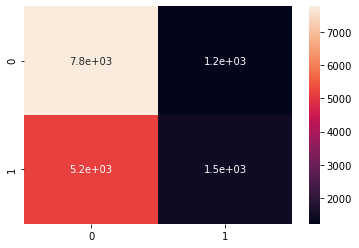

In [50]:
# checking model performance
y_predicted= log_reg.predict(x_test)


#Confusion Matrix
#Find the confusion matrix of the model and estimate its accuracy.

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

cm= confusion_matrix(y_test, y_predicted)
print(cm)
sns.heatmap(cm, annot=True)
print(accuracy_score(y_test, y_predicted))
print(classification_report(y_test, y_predicted))

### Q4.2 Build Random Forest classifier to compare model accuracy over the logistic regression model 

# Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)


RandomForestClassifier()

# Model Evaluation 

[[8677  317]
 [2939 3729]]


<AxesSubplot:>

0.7921082875750224
              precision    recall  f1-score   support

         0.0       0.75      0.96      0.84      8994
         1.0       0.92      0.56      0.70      6668

    accuracy                           0.79     15662
   macro avg       0.83      0.76      0.77     15662
weighted avg       0.82      0.79      0.78     15662



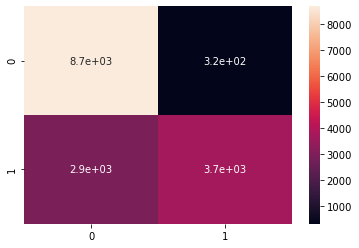

In [52]:
y_pred = rfc.predict(x_test)

cm= confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Result:

With accuracy score of 79% Random Forest classifier is best model to predict the target class

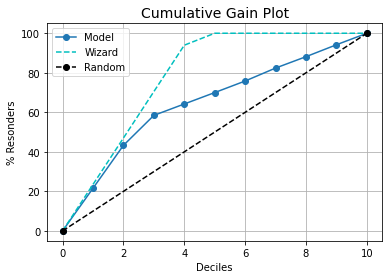

In [53]:
import kds
kds.metrics.plot_cumulative_gain(y_test, y_pred)

# Test Data Output

### Load The Data 

In [54]:
test_data = pd.read_csv("Telecom_Prediction_Data.csv")

### Descriptive Statistics 

In [55]:
test_data.shape

(20000, 58)

In [56]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 20000 non-null  int64  
 1   Churn                      0 non-null      float64
 2   MonthlyRevenue             19940 non-null  float64
 3   MonthlyMinutes             19940 non-null  float64
 4   TotalRecurringCharge       19940 non-null  float64
 5   DirectorAssistedCalls      19940 non-null  float64
 6   OverageMinutes             19940 non-null  float64
 7   RoamingCalls               19940 non-null  float64
 8   PercChangeMinutes          19865 non-null  float64
 9   PercChangeRevenues         19865 non-null  float64
 10  DroppedCalls               20000 non-null  float64
 11  BlockedCalls               20000 non-null  float64
 12  UnansweredCalls            20000 non-null  float64
 13  CustomerCareCalls          20000 non-null  flo

In [57]:
test_data.describe()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,2.000000e+04,0.0,19940.000000,19940.000000,19940.000000,19940.000000,19940.000000,19940.000000,19865.000000,19865.000000,...,20000.000000,20000.000000,20000.000000,19665.000000,19665.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000
mean,3.201925e+06,NaN,58.899712,525.912136,46.946640,0.893764,40.240722,1.186765,-9.052806,-1.237246,...,1.816200,1.569550,379.550450,31.469413,21.192321,0.036500,0.017000,0.04775,4.359000,0.051250
std,1.165204e+05,NaN,43.564203,530.825481,24.083351,2.116538,95.740506,6.848963,249.609021,36.638292,...,1.348669,0.914223,255.552901,22.050726,23.882983,0.204132,0.138967,0.24119,3.134009,0.353312
min,3.000006e+06,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2518.000000,-459.000000,...,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,3.100522e+06,NaN,33.720000,159.000000,30.000000,0.000000,0.000000,0.000000,-82.000000,-7.200000,...,1.000000,1.000000,202.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
50%,3.201338e+06,NaN,48.665000,365.000000,45.000000,0.250000,2.000000,0.000000,-4.000000,-0.300000,...,1.000000,1.000000,331.000000,36.000000,0.000000,0.000000,0.000000,0.00000,5.000000,0.000000
75%,3.304237e+06,NaN,70.882500,718.000000,60.000000,0.990000,40.000000,0.300000,66.000000,1.600000,...,2.000000,2.000000,513.000000,48.000000,44.000000,0.000000,0.000000,0.00000,7.000000,0.000000
max,3.399986e+06,NaN,635.060000,7668.000000,350.000000,67.810000,3472.000000,488.800000,3222.000000,895.600000,...,28.000000,16.000000,1823.000000,98.000000,99.000000,4.000000,4.000000,5.00000,9.000000,14.000000


#### Drop the Customer ID and  Churn

In [58]:
test_data.drop(['CustomerID', 'Churn'], axis = 1, inplace= True)

In [59]:
# Check the Data types
test_data.dtypes

MonthlyRevenue               float64
MonthlyMinutes               float64
TotalRecurringCharge         float64
DirectorAssistedCalls        float64
OverageMinutes               float64
RoamingCalls                 float64
PercChangeMinutes            float64
PercChangeRevenues           float64
DroppedCalls                 float64
BlockedCalls                 float64
UnansweredCalls              float64
CustomerCareCalls            float64
ThreewayCalls                float64
ReceivedCalls                float64
OutboundCalls                float64
InboundCalls                 float64
PeakCallsInOut               float64
OffPeakCallsInOut            float64
DroppedBlockedCalls          float64
CallForwardingCalls          float64
CallWaitingCalls             float64
MonthsInService                int64
UniqueSubs                     int64
ActiveSubs                     int64
ServiceArea                   object
Handsets                       int64
HandsetModels                  int64
C

### Missing Value Analysis 

In [60]:
missing_value = test_data.isna().sum()
missing_value_Percent = (missing_value/len(test_data))*100
missing_value_analysis = {'missing_value': missing_value , 'missing_value_percentage': missing_value_Percent}
missing_value_analysis = pd.DataFrame(missing_value_analysis)
missing_value_analysis

,missing_value,missing_value_percentage
MonthlyRevenue,60,0.300
MonthlyMinutes,60,0.300
TotalRecurringCharge,60,0.300
DirectorAssistedCalls,60,0.300
OverageMinutes,60,0.300
RoamingCalls,60,0.300
PercChangeMinutes,135,0.675
PercChangeRevenues,135,0.675
DroppedCalls,0,0.000
BlockedCalls,0,0.000


In [61]:
#drop the missing value
test_data = test_data.dropna()

In [62]:
#wrapper function to create additional features for churn prediction
def create_features(test_data):
    
    #3.1 Percent of current active subs over total subs
    
    test_data['perc_active_subs'] = test_data['ActiveSubs'] / test_data['UniqueSubs']
    
    #3.2 Percent of recurrent charge to monthly charge
    
    test_data['perc_recurrent_charge']= test_data['TotalRecurringCharge'] / test_data['MonthlyRevenue']
    
    #3.3 Percent of overage minutes over total monthly minutes
    
    test_data['perc_overage_min']= test_data['OverageMinutes'] / test_data['MonthlyMinutes']
    
    # Total of Not Answered Calls
    
    test_data['Not_Answered_Calls'] = test_data['DroppedBlockedCalls']+test_data['DroppedCalls']+test_data['BlockedCalls']+test_data['UnansweredCalls']
    
    
    
    return test_data  

In [63]:
#Make a call to the feature engineering wrapper function for churn prediction
test_data=create_features(test_data)
test_data.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_overage_min,Not_Answered_Calls
0,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,8.3,1.0,...,150,No,5-Low,Other,Other,No,1.000000,0.643590,0.047619,79.9
1,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,9.7,0.7,...,80,No,1-Highest,Other,Professional,No,1.000000,1.303639,0.000000,97.7
2,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,12.7,3.0,...,10,No,3-Good,Suburban,Crafts,Yes,1.000000,0.513663,0.404235,207.4
3,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,2.0,0.7,...,200,No,1-Highest,Other,Other,No,0.666667,0.842933,0.104575,22.7
4,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,2.7,6.0,...,10,No,1-Highest,Suburban,Other,No,1.000000,0.904650,0.000000,61.1


In [64]:
# drop the columns after creating new important features
test_data= test_data.drop(['ActiveSubs', 'UniqueSubs', 'TotalRecurringCharge', 'MonthlyRevenue', 'OverageMinutes', 'MonthlyMinutes',
                
                'DroppedBlockedCalls', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls'], axis = 1)

#### Encoding the categorical features 

In [65]:
#categorical features
cat_var = ['ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 
           'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings', 
           'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser', 'NotNewCellphoneUser', 
           'OwnsMotorcycle', 'HandsetPrice', 'MadeCallToRetentionTeam', 'CreditRating', 
           'PrizmCode', 'Occupation', 'MaritalStatus', 'ServiceArea']

from sklearn.preprocessing import LabelEncoder

# initializing label encoder
le= LabelEncoder()

# iterating through each categorical feature and label encoding them
for feature in cat_var:
    test_data[feature]= le.fit_transform(test_data[feature])

In [66]:
#Rechecking the data types
test_data.dtypes

DirectorAssistedCalls        float64
RoamingCalls                 float64
PercChangeMinutes            float64
PercChangeRevenues           float64
CustomerCareCalls            float64
ThreewayCalls                float64
ReceivedCalls                float64
OutboundCalls                float64
InboundCalls                 float64
PeakCallsInOut               float64
OffPeakCallsInOut            float64
CallForwardingCalls          float64
CallWaitingCalls             float64
MonthsInService                int64
ServiceArea                    int32
Handsets                       int64
HandsetModels                  int64
CurrentEquipmentDays           int64
AgeHH1                       float64
AgeHH2                       float64
ChildrenInHH                   int32
HandsetRefurbished             int32
HandsetWebCapable              int32
TruckOwner                     int32
RVOwner                        int32
Homeownership                  int32
BuysViaMailOrder               int32
R

### Final Clean the test data to avoid any kind of error

In [67]:
def clean_dataset(test_data):
    assert isinstance(test_data, pd.DataFrame), "df needs to be a pd.DataFrame"
    test_data.dropna(inplace=True)
    indices_to_keep = ~test_data.isin([np.nan, np.inf, -np.inf]).any(1)
    return test_data[indices_to_keep].astype(np.float64)

In [68]:
# Clean the Test data
test_data =  clean_dataset(test_data)
test_data.shape

(19252, 50)

# Churn Prediction

In [69]:
#write the cleaned test file in system
test_data.to_csv('test_output.csv', header =True, index =False)

In [70]:
#Predicting the Churn Rate for test data
test_data.shape
Churn = ()

(19252, 50)

In [71]:
#implementing RamdomForest model on test dataset
pred_test = rfc.predict(test_data)

In [72]:
#print the result
pred_test

array([0., 0., 0., ..., 0., 0., 1.])

In [73]:
#checking the pred_test
pred_test.shape

(19252,)

In [74]:
#final result submission
Test_RF_Output = pd.read_csv("test_output.csv")
Test_RF_Output['Churn'] = pred_test
Test_RF_Output.to_csv('Test_RF_Output.csv', index=False)
Test_RF_Output.head(20)

,DirectorAssistedCalls,RoamingCalls,PercChangeMinutes,PercChangeRevenues,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,...,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_overage_min,Not_Answered_Calls,Churn
0,0.25,0.0,532.0,51.0,1.7,0.3,55.3,46.3,6.3,83.7,...,0.0,4.0,0.0,3.0,0.0,1.000000,0.643590,0.047619,79.9,0.0
1,0.00,0.0,38.0,0.0,8.7,0.0,106.3,14.7,0.7,97.3,...,0.0,0.0,0.0,4.0,0.0,1.000000,1.303639,0.000000,97.7,0.0
2,4.95,0.0,198.0,23.3,11.3,0.3,213.9,103.3,0.3,238.3,...,0.0,2.0,2.0,1.0,2.0,1.000000,0.513663,0.404235,207.4,0.0
3,0.00,0.0,30.0,7.3,0.0,0.0,33.1,8.0,4.7,48.3,...,0.0,0.0,0.0,3.0,0.0,0.666667,0.842933,0.104575,22.7,0.0
4,0.74,1.3,169.0,1.0,4.3,0.0,490.1,50.7,8.3,189.3,...,0.0,0.0,2.0,3.0,0.0,1.000000,0.904650,0.000000,61.1,0.0
5,0.25,0.0,-1134.0,-55.2,0.3,0.0,939.3,7.7,39.0,459.7,...,1.0,4.0,2.0,3.0,2.0,1.000000,0.930387,0.000000,59.1,0.0
6,0.00,0.0,-48.0,-0.5,1.0,0.3,77.5,6.3,5.0,45.7,...,0.0,2.0,0.0,3.0,2.0,1.000000,0.980777,0.003333,19.7,0.0
7,0.25,0.0,25.0,-1.7,0.0,0.0,244.6,20.0,8.0,206.3,...,1.0,0.0,0.0,3.0,0.0,1.000000,0.955921,0.005144,50.7,1.0
8,0.00,0.0,88.0,3.6,0.0,0.0,47.7,6.3,4.3,93.3,...,0.0,3.0,0.0,4.0,2.0,1.000000,0.932836,0.133005,31.7,0.0
9,11.14,62.3,204.0,6.9,0.0,1.7,871.5,210.7,96.3,732.3,...,0.0,0.0,3.0,3.0,1.0,1.000000,0.408330,0.488011,152.7,0.0


In [75]:
Test_RF_Output['Churn'].value_counts()

0.0    12223
1.0     7029
Name: Churn, dtype: int64

### Q4.3 Identify most important features impacting churn

In [76]:
pd.Series(rfc.feature_importances_, index=x_train.columns)

DirectorAssistedCalls        0.023527
RoamingCalls                 0.021149
PercChangeMinutes            0.046274
PercChangeRevenues           0.038818
CustomerCareCalls            0.019490
ThreewayCalls                0.012043
ReceivedCalls                0.035551
OutboundCalls                0.033263
InboundCalls                 0.026740
PeakCallsInOut               0.036100
OffPeakCallsInOut            0.034985
CallForwardingCalls          0.000365
CallWaitingCalls             0.018138
MonthsInService              0.051906
Handsets                     0.013394
HandsetModels                0.015713
CurrentEquipmentDays         0.057914
AgeHH1                       0.027409
AgeHH2                       0.019970
ChildrenInHH                 0.012354
HandsetRefurbished           0.014712
HandsetWebCapable            0.014403
TruckOwner                   0.011187
RVOwner                      0.005007
Homeownership                0.011012
BuysViaMailOrder             0.025301
RespondsToMa

# Thank You